In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("05_07_21_5CB_Abs")[0:44]
data

,5CB concentration wtf,ethanol concentration wtf,water concentration wtf,5CB amount mass g,5CB amount volume uL,ethanol amount mass g,ethanol amount volume uL,water amount mass g,water amount volume uL,5CB-ethanol-stock amount volume uL,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,0.00000,0.100000,0.900000,0.00000,0.000000,0.100000,126.694539,0.900000,900.000000,0.0,...,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.045,0.045
1,0.00025,0.100000,0.899750,0.00025,0.247525,0.100000,126.694539,0.899750,899.750000,100.0,...,0.561,0.553,0.544,0.535,0.526,0.518,0.509,0.501,0.492,0.485
2,0.00000,0.177778,0.822222,0.00000,0.000000,0.177778,225.234737,0.822222,822.222222,0.0,...,0.057,0.057,0.057,0.057,0.056,0.056,0.056,0.055,0.055,0.055
3,0.00025,0.177778,0.821972,0.00025,0.247525,0.177778,225.234737,0.821972,821.972222,100.0,...,0.553,0.544,0.535,0.526,0.517,0.508,0.500,0.492,0.483,0.475
4,0.00050,0.177778,0.821722,0.00050,0.495050,0.177778,225.234737,0.821722,821.722222,200.0,...,1.205,1.189,1.173,1.156,1.140,1.124,1.107,1.092,1.076,1.061
5,0.00000,0.255556,0.744444,0.00000,0.000000,0.255556,323.774934,0.744444,744.444444,0.0,...,0.045,0.045,0.045,0.045,0.045,0.044,0.044,0.044,0.044,0.044
6,0.00025,0.255556,0.744194,0.00025,0.247525,0.255556,323.774934,0.744194,744.194444,100.0,...,0.655,0.647,0.638,0.629,0.620,0.612,0.603,0.595,0.586,0.578
7,0.00050,0.255556,0.743944,0.00050,0.495050,0.255556,323.774934,0.743944,743.944444,200.0,...,1.379,1.366,1.353,1.339,1.326,1.313,1.300,1.287,1.273,1.260
8,0.00075,0.255556,0.743694,0.00075,0.742574,0.255556,323.774934,0.743694,743.694444,300.0,...,1.538,1.524,1.510,1.496,1.480,1.466,1.452,1.438,1.422,1.408
9,0.00000,0.333333,0.666667,0.00000,0.000000,0.333333,422.315132,0.666667,666.666667,0.0,...,0.048,0.048,0.048,0.048,0.048,0.048,0.047,0.047,0.047,0.047


In [34]:
# ethanol = data.groupby('ethanol concentration wtf')
# ethanol.get_group()

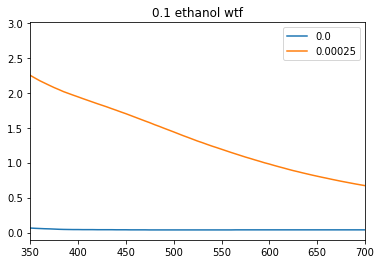

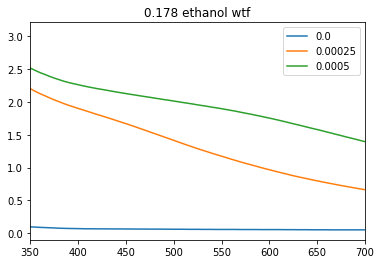

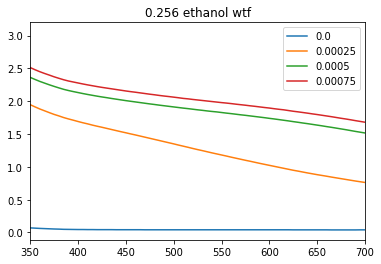

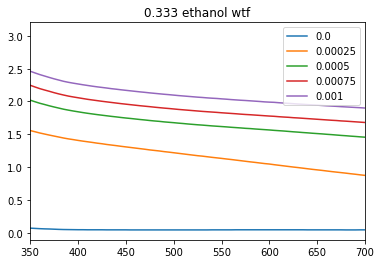

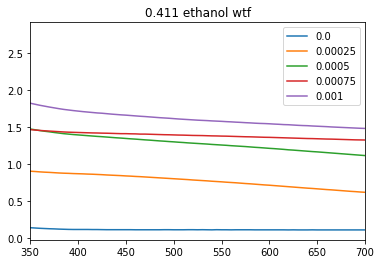

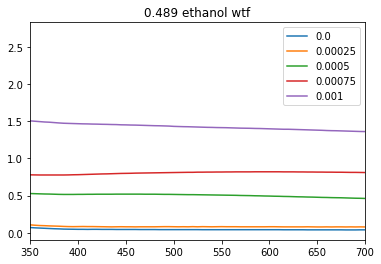

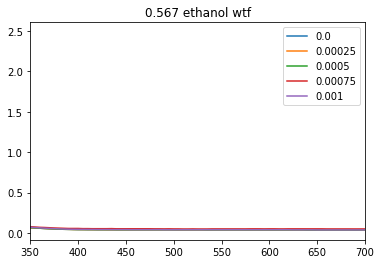

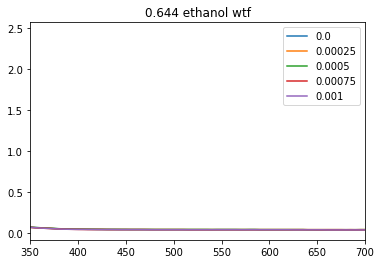

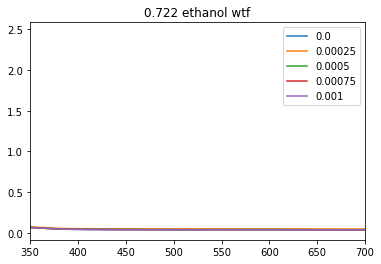

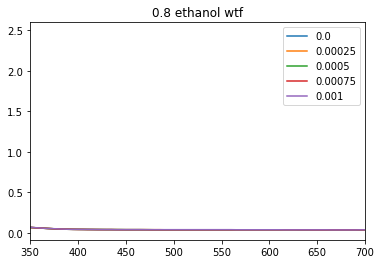

In [50]:
unique_ethanols = data['ethanol concentration wtf'].unique()
wavelength_columns = [col for col in data.columns if "nm" in col]
wavelengths = [float(w.replace("nm", "")) for w in wavelength_columns]


for e in unique_ethanols:
    unique_ethanol_data = data[data['ethanol concentration wtf'] == e]
    CB_concs = unique_ethanol_data['5CB concentration wtf']
    unique_ethanol_spectra = unique_ethanol_data[wavelength_columns]
    fig, ax = plt.subplots(1,1)
    for i, row in unique_ethanol_spectra.iterrows():
        row = list(row)
        ax.plot(wavelengths, row, label = CB_concs[i])
        ax.set_title(str(round(e,3)) + ' ethanol wtf')
        ax.set_xlim(350,700)
    ax.legend()
    

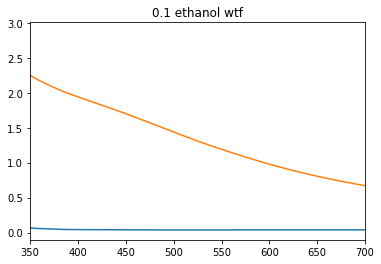

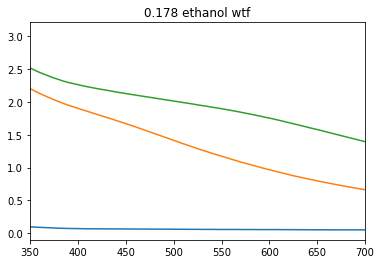

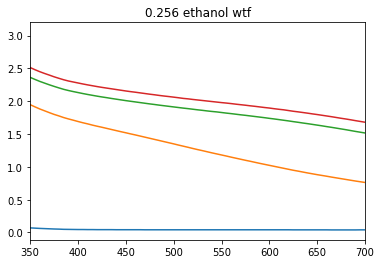

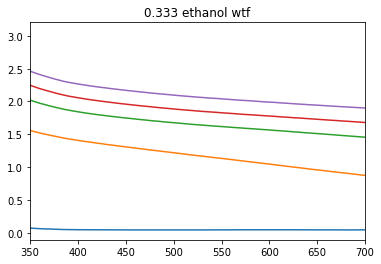

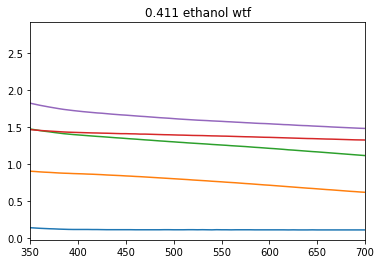

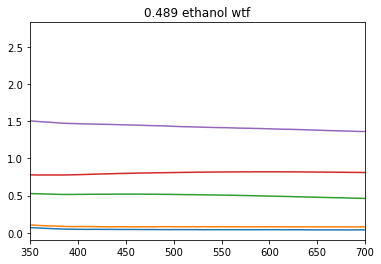

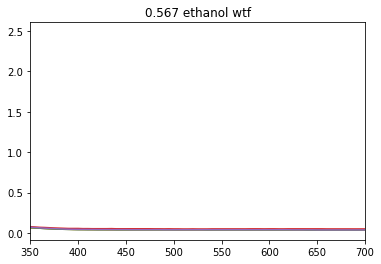

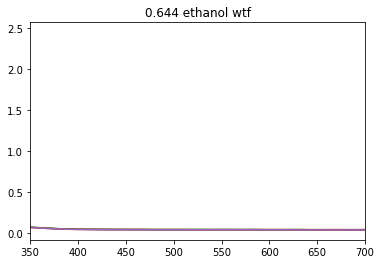

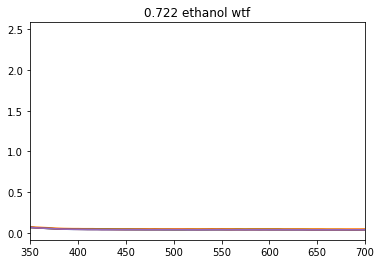

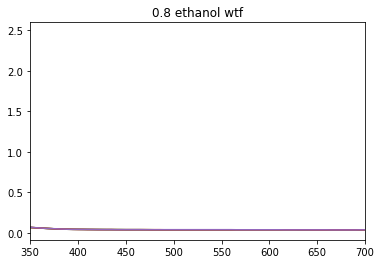

In [64]:
grouper = data.groupby('ethanol concentration wtf')

for i, df_i in grouper:
    fig,ax=plt.subplots()
    for j, row_j in df_i.iterrows():
        x = wavelengths
        y = row_j[wavelength_columns]
        ax.plot(x,y)
        ax.set_title(str(round(i,3)) + ' ethanol wtf')
        ax.set_xlim(350,700)

In [59]:
data[wavelength_columns]

,300.0nm,305.0nm,310.0nm,315.0nm,320.0nm,325.0nm,330.0nm,335.0nm,340.0nm,345.0nm,...,755.0nm,760.0nm,765.0nm,770.0nm,775.0nm,780.0nm,785.0nm,790.0nm,795.0nm,800.0nm
0,0.278,0.194,0.163,0.144,0.124,0.110,0.098,0.085,0.074,0.068,...,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.046,0.045,0.045
1,2.867,2.803,2.776,2.758,2.736,2.631,2.500,2.413,2.347,2.295,...,0.561,0.553,0.544,0.535,0.526,0.518,0.509,0.501,0.492,0.485
2,0.312,0.232,0.202,0.183,0.163,0.148,0.136,0.122,0.110,0.104,...,0.057,0.057,0.057,0.057,0.056,0.056,0.056,0.055,0.055,0.055
3,2.842,2.775,2.749,2.728,2.691,2.571,2.441,2.356,2.295,2.243,...,0.553,0.544,0.535,0.526,0.517,0.508,0.500,0.492,0.483,0.475
4,3.057,2.984,2.954,2.930,2.917,2.893,2.766,2.667,2.602,2.551,...,1.205,1.189,1.173,1.156,1.140,1.124,1.107,1.092,1.076,1.061
5,0.316,0.220,0.185,0.165,0.141,0.125,0.111,0.094,0.082,0.075,...,0.045,0.045,0.045,0.045,0.045,0.044,0.044,0.044,0.044,0.044
6,2.696,2.616,2.579,2.532,2.429,2.276,2.160,2.085,2.029,1.984,...,0.655,0.647,0.638,0.629,0.620,0.612,0.603,0.595,0.586,0.578
7,2.963,2.884,2.848,2.820,2.793,2.723,2.593,2.503,2.444,2.399,...,1.379,1.366,1.353,1.339,1.326,1.313,1.300,1.287,1.273,1.260
8,3.051,2.982,2.950,2.926,2.908,2.877,2.752,2.659,2.596,2.550,...,1.538,1.524,1.510,1.496,1.480,1.466,1.452,1.438,1.422,1.408
9,0.278,0.197,0.166,0.148,0.129,0.115,0.103,0.090,0.080,0.074,...,0.048,0.048,0.048,0.048,0.048,0.048,0.047,0.047,0.047,0.047
